In [77]:
##Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
##Variables
nu=1e-6
mu=1e-3
rho=1e+3
dt=0.01
gradP=-0.375
u_avg=0.0125
nx=60
ny=30

In [78]:
def ref_vel_prof(x2):
    return -1200*((x2-0.005)**2)+0.03

In [79]:
Nx=2*nx+1
Ny=2*ny+1
L=0.04
H=0.02
h=L/nx
L_sq=np.array([1.0,1.0])

In [80]:
x1=np.linspace(0, L, num=2*nx+1)
x2=np.linspace(0, H, num=2*ny+1)
xi=0.5*np.linspace(0, Nx, num=Nx+1)
xi=np.insert(xi, 0, -0.5)
xj=0.5*np.linspace(0, Ny, num=Ny+1)
xj=np.insert(xj, 0, -0.5)

In [81]:
un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
un_actual=un.reshape((Nx+2,Ny+2))
s=pd.DataFrame(np.flipud(un_actual.T))
s.columns=(s.columns/2) -0.5
s.index=(s.index/2) -0.5
s = s.iloc[::-1]
# s.loc[ny+0.5]=0
# s.loc[-0.5]=0
# s[-0.5]=float(0)
# s[nx+0.5]=float(0)




In [82]:
def BC_drich(s):
    #s.loc[0.5]=-s.loc[-0.5]
    s.loc[-0.5]=-s.loc[0.5]
    #s.loc[ny-0.5]=-s.loc[ny+0.5]
    s.loc[ny+0.5]=-s.loc[ny-0.5]
    return s

In [83]:
a=BC_drich(s)

In [84]:
a

,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,...,56.0,56.5,57.0,57.5,58.0,58.5,59.0,59.5,60.0,60.5
30.5,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,...,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125,-0.0125
30.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
29.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
29.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
28.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
0.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
0.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125


In [85]:
def BC_period(s):
    s[0]=s[nx-1]
    s[nx]=s[1]
    return s

In [86]:
def diff(s):
    qo = s.copy()
    for x1 in s.columns:
        for x2 in s.index:
            if ((x1>1) and (x1<nx-1) and (x1.is_integer()==True) ):
                if ((x2>1) and (x2<ny-1) and (x2.is_integer()==False)):
                    qo[x1][x2] = (1/(h**2))*(s[x1+1][x2]+s[x1-1][x2]+s[x1][x2+1]+s[x1][x2-1]-4*s[x1][x2])
    return qo

In [87]:
def corrector_step(s):
    qo = s.copy()
    for x1 in s.columns:
        for x2 in s.index:
            if ((x1>1) and (x1<nx-1) and (x1.is_integer()==True) ):
                if ((x2>1) and (x2<ny-1) and (x2.is_integer()==False)):
                    qo[x1][x2] = s[x1][x2]-(1/rho)*(dt)*(gradP)
    return qo

In [95]:
#un=s.copy()
for step in tqdm(range(1000)):
    us=un+dt*nu*diff(un)
    us=BC_drich(us)
    us=BC_period(us)
    un_1=corrector_step(us)
    un_1=BC_drich(un_1)
    un_1=BC_period(un_1)
    un=un_1

100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [02:58<00:00,  5.61it/s]


In [90]:
ucont=np.array(un)

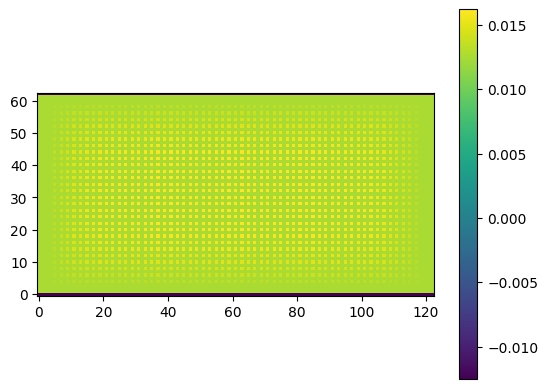

In [96]:
plt.imshow(ucont,origin='lower')
plt.colorbar()

(32, 62)

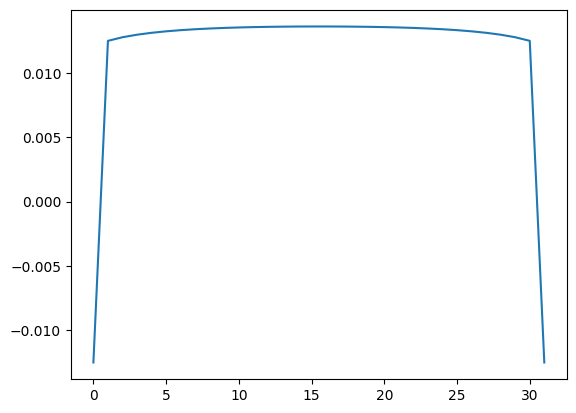

In [97]:
plt.plot(np.array(un[58])[0::2])

In [36]:
u_vel

array([ 0.01250013,  0.01250013, -0.01250013,  0.01250013,  0.00041937,
        0.01250013,  0.00569208,  0.01250013,  0.00828803,  0.01250013,
        0.00978488,  0.01250013,  0.01075199,  0.01250013,  0.01142431,
        0.01250013,  0.0119122 ,  0.01250013,  0.01227407,  0.01250013,
        0.01254417,  0.01250013,  0.01274441,  0.01250013,  0.01288969,
        0.01250013,  0.01299043,  0.01250013,  0.0130538 ,  0.01250013,
        0.01308437,  0.01250013,  0.01308437,  0.01250013,  0.0130538 ,
        0.01250013,  0.01299043,  0.01250013,  0.01288969,  0.01250013,
        0.01274441,  0.01250013,  0.01254417,  0.01250013,  0.01227407,
        0.01250013,  0.0119122 ,  0.01250013,  0.01142431,  0.01250013,
        0.01075199,  0.01250013,  0.00978488,  0.01250013,  0.00828803,
        0.01250013,  0.00569208,  0.01250013,  0.00041937,  0.01250013,
       -0.01250013,  0.01250013,  0.01250013])

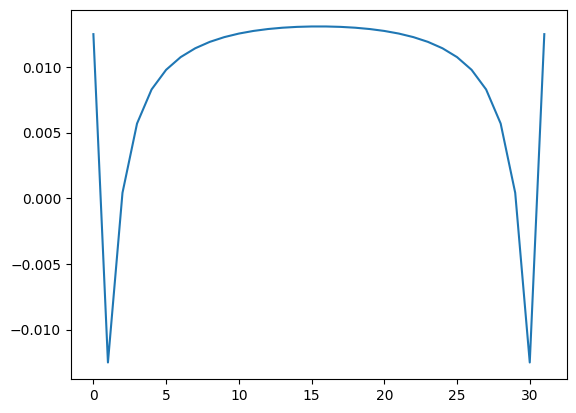